In [1]:
import sys
sys.path.append('/data/wjk/Workspace/PyTools')

In [2]:
import os
os.chdir('/data/wjk/Workspace/Datasets/IGR')

from IPython.display import display
import os.path as osp
import pandas as pd
pd.set_option('display.width', 500)    #设置整体宽度
import numpy as np
from mtools import plot_cdf, plot_fig, load_json
import seaborn as sns
sns.set(**{'style':'whitegrid', 'font':'Times New Roman'})
sns.set(rc = {'figure.figsize':(20, 3)})
sns.set_style("whitegrid", {"axes.edgecolor": "0"})

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = ['Times New Roman']
matplotlib.rcParams['font.weight'] = 'bold'
matplotlib.rcParams['axes.unicode_minus'] = False
def setfontsize(fontsize):
    matplotlib.rcParams['axes.titlesize'] = fontsize
    matplotlib.rcParams['axes.labelsize'] = fontsize
    matplotlib.rcParams['figure.titlesize'] = fontsize
    matplotlib.rcParams['xtick.labelsize'] = fontsize
    matplotlib.rcParams['ytick.labelsize'] = fontsize
    matplotlib.rcParams['legend.fontsize'] = fontsize
setfontsize(24)
df = pd.read_csv('IGRData/export/IGR_cjy_IGR230307_IGR230312_IGR230419_IGR230618_IGR230626/stat_df.csv')
df = df.replace('Mate30_2', 'Mate30')
# include_phone = ['Mate30_2', 'Oneplus9r']
# df=df[df.isin(include_phone)]
df = df.query("qual_s==4 and qual_e==4")
df["err_abs_x"]=np.abs(df["err_x"])
df["err_abs_y"]=np.abs(df["err_y"])
df["length"] = np.sqrt(df["gt_x"]**2 + df["gt_y"]**2)
df["phone_length"] = np.sqrt(df["phone_x"]**2 + df["phone_y"]**2)
pdf = df.rename(columns={'err_x':'Noise east (cm)','err_y':'Noise north (cm)', 'phone':'Device'})

route_type_dict = load_json(osp.join('plots', 'route_type_dict.json'))
train_type_dict = load_json(osp.join('plots', 'train_type_dict.json'))
pdf["Route type"] = pdf["trip"]
pdf["Train type"] = pdf["trip"]

for route in route_type_dict:
    pdf.loc[pdf.__getattr__("Route type") == route, ('Route type')] = route_type_dict[route]
for route in train_type_dict:
    pdf.loc[pdf.__getattr__("Train type") == route, ('Train type')] = train_type_dict[route]

print(df.columns)
print(df.groupby('phone').mean(numeric_only=True))

Index(['err_x', 'err_y', 'err_h', 'gt_x', 'gt_y', 'phone_x', 'phone_y', 'qual_s', 'qual_e', 'phone', 'trip', 'trace', 'err_abs_x', 'err_abs_y', 'length', 'phone_length'], dtype='object')
              err_x     err_y      err_h       gt_x       gt_y    phone_x    phone_y  qual_s  qual_e  err_abs_x  err_abs_y      length  phone_length
phone                                                                                                                                               
Mate30    -0.301992 -0.197371  37.749653  -3.781513  -2.167270  -4.083504  -2.364642     4.0     4.0  24.126431  23.747704  100.154881    116.660602
Mi8        0.431005  0.078477  32.749279 -18.674123 -15.225289 -18.243118 -15.146812     4.0     4.0  19.765197  21.698764  106.479886    107.918517
Oneplus9r -0.129401 -0.261819  44.328933   1.043942   0.737266   0.914541   0.475447     4.0     4.0  28.991211  27.766568  100.153638    112.596875
Pixel4     0.157844 -0.004738  19.155955  16.557623  -3.517839  16.7

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# df[["err_x","err_y","gt_x","gt_y"]].corr().to_csv('Output/corr.csv')
# des.to_csv('Output/error_info.csv')

# des = pdf.groupby('Route type')["err_h"].describe(percentiles=[.2, .25, .5, .75, .8, 0.9])
# print(des)
# des.to_csv('Output/error_info_bytype.csv')

des = df.groupby('phone')["phone_length"].describe(percentiles=[0.01, 0.99])
des = des.reindex(columns=['count', '50%', 'mean', 'std', 'min', 'max', '1%', '99%'])
des = des.rename(columns={'50%': 'median'})
des['sum'] = df.groupby('phone')["phone_length"].sum()/100000
display(des)

des = df.groupby('phone')["length"].describe(percentiles=[0.01, 0.99])
des = des.reindex(columns=['count', '50%', 'mean', 'std', 'min', 'max', '1%', '99%'])
des = des.rename(columns={'50%': 'median'})
des['sum'] = df.groupby('phone')["length"].sum()/100000
display(des)
# des.to_csv('Output/length_info.csv')

des = df.groupby('phone')["err_h"].describe(percentiles=[0.01, 0.99])
des = des.reindex(columns=['count', '50%', 'mean', 'std', 'min', 'max', '1%', '99%'])
des = des.rename(columns={'50%': 'median'})
display(des)

des = df.groupby('phone')["err_x"].describe(percentiles=[0.01, 0.99])
des = des.reindex(columns=['count', '50%', 'mean', 'std', 'min', 'max', '1%', '99%'])
des = des.rename(columns={'50%': 'median'})
display(des)

des = df.groupby('phone')["err_y"].describe(percentiles=[0.01, 0.99])
des = des.reindex(columns=['count', '50%', 'mean', 'std', 'min', 'max', '1%', '99%'])
des = des.rename(columns={'50%': 'median'})
display(des)

,count,median,mean,std,min,max,1%,99%,sum
phone,,,,,,,,,
Mate30,13928.00,109.18,116.66,34.92,2.96,396.01,58.44,237.84,16.25
Mi8,1877.00,107.26,107.92,31.38,7.73,357.68,27.73,199.73,2.03
Oneplus9r,2871.00,113.20,112.60,32.47,15.52,248.60,33.94,199.43,3.23
Pixel4,1909.00,134.24,133.88,18.12,15.23,228.49,78.54,185.84,2.56
Vivox60,1590.00,131.52,142.16,50.46,19.20,514.68,80.03,384.12,2.26


,count,median,mean,std,min,max,1%,99%,sum
phone,,,,,,,,,
Mate30,13928.00,99.60,100.15,10.59,60.44,145.01,78.83,130.83,13.95
Mi8,1877.00,105.90,106.48,11.37,81.67,218.81,90.15,138.07,2.00
Oneplus9r,2871.00,98.70,100.15,14.48,61.67,138.44,71.68,130.53,2.88
Pixel4,1909.00,131.19,130.59,8.18,106.47,156.37,111.92,151.59,2.49
Vivox60,1590.00,128.98,139.63,45.72,72.34,531.98,109.34,380.36,2.22


,count,median,mean,std,min,max,1%,99%
phone,,,,,,,,
Mate30,13928.00,27.51,37.75,32.09,0.27,307.17,2.48,148.21
Mi8,1877.00,24.57,32.75,27.31,0.14,189.65,1.74,126.29
Oneplus9r,2871.00,39.56,44.33,25.43,0.55,182.34,5.19,119.00
Pixel4,1909.00,15.22,19.16,15.60,0.13,155.88,1.74,83.39
Vivox60,1590.00,23.14,26.89,18.22,0.18,151.73,2.51,87.35


,count,median,mean,std,min,max,1%,99%
phone,,,,,,,,
Mate30,13928.00,-0.72,-0.30,35.81,-231.71,224.52,-102.49,114.26
Mi8,1877.00,-0.40,0.43,28.77,-134.75,156.77,-73.72,86.61
Oneplus9r,2871.00,0.46,-0.13,36.64,-139.30,158.86,-83.58,92.50
Pixel4,1909.00,0.31,0.16,17.04,-139.26,103.03,-51.45,51.17
Vivox60,1590.00,0.55,0.37,24.22,-142.87,151.40,-60.24,64.47


,count,median,mean,std,min,max,1%,99%
phone,,,,,,,,
Mate30,13928.00,-0.53,-0.20,34.23,-273.82,257.02,-94.12,97.34
Mi8,1877.00,-0.44,0.08,31.48,-113.65,160.79,-81.11,100.27
Oneplus9r,2871.00,-3.53,-0.26,35.63,-172.41,140.59,-77.05,92.13
Pixel4,1909.00,0.17,-0.00,17.89,-99.17,110.96,-49.66,49.81
Vivox60,1590.00,-0.61,-0.91,21.63,-130.55,86.61,-52.30,53.37


[[<Axes: xlabel='Noise (cm)', ylabel='CDF'>]]


/tmp/ipykernel_18186/3164547687.py:13: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = g._legend.legendHandles[::-1]


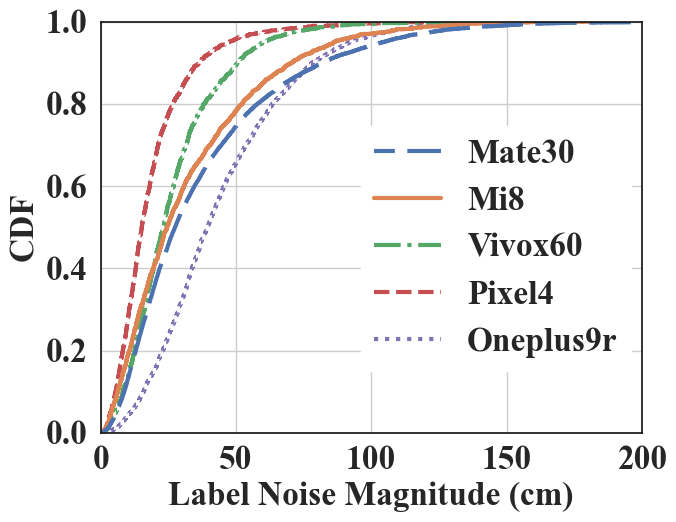

In [25]:
# setfontsize(24)
fontsize = 24
# g = plot_cdf(df, 'err_h', xlabel='Noise magnitude (cm)', xlim=[0, 200], plot_params={'aspect':1.2})
# plt.show()
# g.savefig('Figures/err_h_cdf.png', dpi=150, pad_inches=0.2)

# g = plot_cdf(pdf, 'err_h', xlabel='Noise magnitude (cm)', xlim=[0, 200], fig_param={'font_scale':2.0}, plot_params={'aspect':1.2, 'hue':'Device'}) # 'col':'phone', 'col_wrap': 4
g = plot_cdf(pdf, xlim=[0, 200], xlabel='Noise (cm)', plot_params={'x':'err_h', 'hue':'Device', 'aspect':1.3, 'height':5, 'linewidth':3}) # , fig_param={'font_scale':2.0}
# sns.set(style='whitegrid',color_codes=True)
print(g.axes)
# sns.despine(g.figure, top=True,right=True,left=True,bottom=True, offset=None, trim=False)
lss = [':', '--', '-.', '-', (5, (10, 3))]
handles = g._legend.legendHandles[::-1]

for ax in g.axes.flat:
    for line, ls in zip(ax.lines, lss):
        line.set_linestyle(ls)
    ax.spines['top'].set(visible=True, edgecolor='k', alpha=1)
    ax.spines['right'].set(visible=True, edgecolor='k', alpha=1)
    ax.spines['left'].set(visible=True, edgecolor='k', alpha=1)
    ax.spines['bottom'].set(visible=True, edgecolor='k', alpha=1)

for handle, ls in zip(handles, lss):
    handle.set_ls(ls)
sns.move_legend(g, 'center right', bbox_to_anchor=(0.80, 0.5), frameon=True, framealpha=1, facecolor='w', edgecolor='w', fancybox=False, fontsize=fontsize)
g.legend.set_title('')
g.set_ylabels('CDF', fontdict={'fontsize':fontsize, 'fontweight':'bold'})
g.set_xlabels('Label Noise Magnitude (cm)', fontdict={'fontsize':fontsize, 'fontweight':'bold'})
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelsize=fontsize)
    ax.tick_params(axis='y', labelsize=fontsize)
plt.show()
# g.savefig('Figures/err_h_cdf_byphone.png', dpi=150, pad_inches=0.2)
g.figure.savefig('Figures/noiseD.pdf', bbox_inches='tight', transparent=True, pad_inches=0)
# g = plot_cdf(pdf, 'err_h', xlabel='Noise magnitude (cm)', xlim=[0, 200], fig_param={'font_scale':2.0}, plot_params={'aspect':1.2, 'hue':'Route type'}) # 'col':'phone', 'col_wrap': 4
# plt.show()
# g.savefig('Figures/err_h_cdf_bytype.png', dpi=150, pad_inches=0.2)

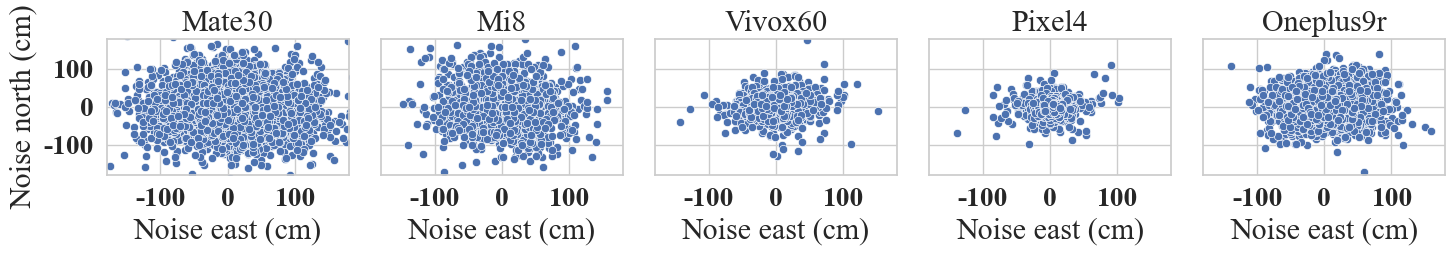

In [8]:
sns.set(**{'style':'whitegrid', 'font_scale':1.8, 'font':'Times New Roman'})
g = sns.FacetGrid(pdf, col="Device",  col_wrap=5, xlim=[-180, 180], ylim=[-180, 180], despine=False)
g.map(sns.scatterplot, "Noise east (cm)", "Noise north (cm)")
g.set_titles("{col_name}")

plt.show()
g.savefig('Figures/err_scatter_byphone.png', dpi=150, pad_inches=0.2)

# sns.set(**{'style':'whitegrid', 'font_scale':1.8, 'font':'Times New Roman'})
# g = sns.FacetGrid(pdf, col="Route type",  col_wrap=4, xlim=[-180, 180], ylim=[-180, 180], despine=False)
# g.map(sns.scatterplot, "Noise east (cm)", "Noise north (cm)")
# g.set_titles("{col_name}")
# plt.show()
# g.savefig('Figures/err_scatter_bytype.png', dpi=150, pad_inches=0.2)

/tmp/ipykernel_18186/4221389831.py:10: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = g._legend.legendHandles[::-1]


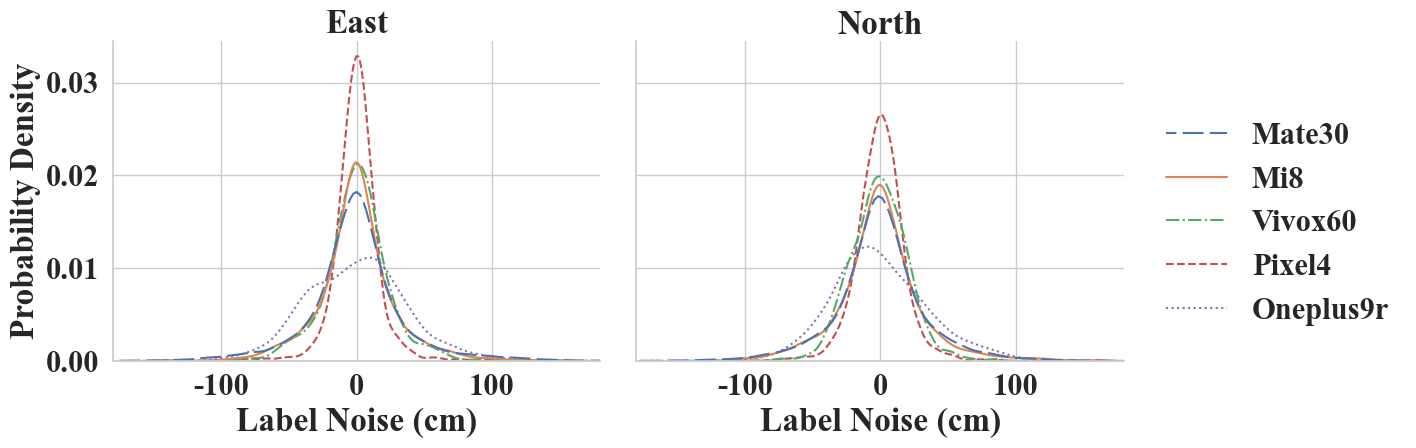

In [17]:
import numpy as np
new_df = pd.DataFrame({
    'err': np.hstack((df['err_x'].values, df['err_y'].values)),
    'phone': np.hstack((df['phone'].values, df['phone'].values)),
    'type': ['East']*len(pdf) + ['North']*len(pdf)
})
g = plot_fig(sns.displot, new_df, xlim=[-180, 180], xlabel='Noise (cm)', ylabel='Probability Density', fig_param={'font_scale':2.0}, plot_params={'x':'err', 'kind':'kde', 'aspect':1.2, 'hue':'phone', 'common_norm':False, 'col': 'type'}) # 
axes = g.axes.flat
lss = [':', '--', '-.', '-', (5, (10, 3))]
handles = g._legend.legendHandles[::-1]

for ax in axes:
    for line, ls in zip(ax.lines, lss):
        line.set_linestyle(ls)
        
for handle, ls in zip(handles, lss):
    handle.set_ls(ls)
# for ax in g.axes.flat:
#     ax.set(labelsize=24)
g.legend.set_title('')
g.set_titles("{col_name}", fontdict={'fontweight':'bold'})
g.set_ylabels('Probability Density', fontdict={'fontweight':'bold'})
g.set_xlabels('Label Noise (cm)', fontdict={'fontweight':'bold'})
plt.show()
# g.savefig('Figures/err_dist_byphone.png', dpi=150, pad_inches=0.2)
# g.figure.savefig('Figures/err_dist_byphone.pdf', bbox_inches='tight', transparent=True, pad_inches=0)
# new_df = pd.DataFrame({
#     'err': np.hstack((df['err_x'].values, df['err_y'].values)),
#     'Route type': np.hstack((pdf['Route type'].values, pdf['Route type'].values)),
#     'type': ['East']*len(pdf) + ['North']*len(pdf)
# })
# g = plot_fig(sns.displot, new_df, xlim=[-180, 180], xlabel='Noise (cm)', ylabel='Probability Density', fig_param={'font_scale':2.0}, plot_params={'x':'err', 'kind':'kde', 'aspect':1.2, 'hue':'Route type', 'common_norm':False, 'col': 'type'}) # 
# g.set_titles("{col_name}")
# plt.show()
# g.savefig('Figures/err_dist_bytype.png', dpi=150, pad_inches=0.2)